In [80]:
#Learning
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
import seaborn as sea
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sea

In [7]:
data=pd.read_csv("HR_comma_sep.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [36]:
g=sea.lmplot(y="Employees",data=data)

TypeError: lmplot() missing 1 required positional argument: 'x'

In [11]:
features=data.drop(labels=['left'],axis=1)
features=pd.get_dummies(features)
features.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [12]:
target=data['left']
target.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [18]:
n_records=target.shape[0]
from collections import Counter
n_left=sum(Counter([x for x in target if x==1]).values())
print("Total number of records: "+str(n_records))
print("Total number of people who left before over-sampling: "+str(n_left))
print("Total number of people who stayed before over_sampling: "+str(n_records-n_left))

Total number of records: 14999
Total number of people who left before over-sampling: 3571
Total number of people who stayed before over_sampling: 11428


In [38]:
rb=RobustScaler()
features=rb.fit_transform(features)

In [39]:
#splitting into training and testing
training_features,testing_features,training_target,testing_target=train_test_split(features,target,random_state=10,test_size=.2)
training_records=training_target.shape[0]
print(training_records)

11999


In [40]:
sm=SMOTE(random_state=10,ratio=1.0)
training_features_sm,training_target_sm=sm.fit_sample(training_features,training_target)
print(training_features_sm.shape[0])

C:\Users\Siddharth\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


18324


In [41]:
training_records_sm=training_target_sm.shape[0]
from collections import Counter
n_left_sm=sum(Counter([x for x in training_target_sm if x==1]).values())
print("Total number of records: "+str(training_records_sm))
print("Total number of people who left before over-sampling: "+str(n_left_sm))
print("Total number of people who stayed before over_sampling: "+str(training_records_sm-n_left_sm))

Total number of records: 18324
Total number of people who left before over-sampling: 9162
Total number of people who stayed before over_sampling: 9162


In [42]:
#now training feature ->  training_features_sm
#training targets -> training_target_sm
#testing feature -> testing features
#tesing targets -> testing targets

In [71]:
#Logistic Regression
logreg=LogisticRegression()
logreg.fit(training_features_sm,training_target_sm)
print("Accuracy: {}".format(accuracy_score(testing_target,logreg.predict(testing_features))))
print("Precision: {}".format(precision_score(testing_target,logreg.predict(testing_features))))
print("Recall : {}".format(recall_score(testing_target,logreg.predict(testing_features))))

Accuracy: 0.7606666666666667
Precision: 0.5069444444444444
Recall : 0.7956403269754768


In [72]:
#deision tree
dt=DecisionTreeClassifier(min_samples_split=10)
dt.fit(training_features_sm,training_target_sm)
print("Accuracy: {}".format(accuracy_score(testing_target,dt.predict(testing_features))))
print("Precision: {}".format(precision_score(testing_target,dt.predict(testing_features))))
print("Recall : {}".format(recall_score(testing_target,dt.predict(testing_features))))

Accuracy: 0.9716666666666667
Precision: 0.9513212795549374
Recall : 0.9318801089918256


In [73]:
#random Forest Classifier
rf=RandomForestClassifier()
rf.fit(training_features_sm,training_target_sm)
print("Accuracy: {}".format(accuracy_score(testing_target,rf.predict(testing_features))))
print("Precision: {}".format(precision_score(testing_target,rf.predict(testing_features))))
print("Recall : {}".format(recall_score(testing_target,rf.predict(testing_features))))

Accuracy: 0.982
Precision: 0.9815864022662889
Recall : 0.944141689373297


In [62]:
training_features_cv,testing_features_cv,training_target_cv,testing_target_cv=train_test_split(features,target,test_size=.20)

In [81]:
#lets try performing k-fold cross validation
cv_logreg=LogisticRegression()
score_logreg=cross_val_score(cv_logreg,training_features_cv,training_target_cv,cv=5)
print("Accuracy: {} with (+/- {})".format(score.mean(),score.std() *2))

Accuracy: 0.7916490898985689 with (+/- 0.014541925235590168)


In [64]:
#lets try performing k-fold cross validation
cv_dt=DecisionTreeClassifier()
score_dt=cross_val_score(cv_dt,training_features_cv,training_target_cv,cv=5)
print("Accuracy: {} with (+/- {})".format(score.mean(),score.std() *2))

Accuracy: 0.9776649645685703 with (+/- 0.005362063529510396)


In [65]:
#lets try performing k-fold cross validation
cv_rf=RandomForestClassifier()
score_rf=cross_val_score(cv_rf,training_features_cv,training_target_cv,cv=5)
print("Accuracy: {} with (+/- {})".format(score.mean(),score.std() *2))

Accuracy: 0.9869986452688619 with (+/- 0.005014614988754522)


In [89]:
#features complete for CV
cv_logreg=LogisticRegression()
score_cv_logreg=cross_val_score(cv_logreg,features,target,cv=5)
print("Accuracy: {} with (+/- {})".format(score_cv_logreg.mean(),score.std() *2))

Accuracy: 0.7694433166196277 with (+/- 0.01636532892110572)


In [90]:
cv_dt=DecisionTreeClassifier()
score_cv_dt=cross_val_score(cv_dt,features,target,cv=5)
print("Accuracy: {} with (+/- {})".format(score_cv_dt.mean(),score.std() *2))

Accuracy: 0.9739991542665727 with (+/- 0.01636532892110572)


In [107]:
cv_rf=RandomForestClassifier()
score_cv_rf_p=cross_val_score(cv_rf,features,target,cv=5,scoring='precision_weighted')
print("Precision: {} with (+/- {})".format(score_cv_rf_p.mean(),score_cv_rf_p.std() *2))
score_cv_rf_r=cross_val_score(cv_rf,features,target,cv=5,scoring='recall_weighted')
print("Recall: {} with (+/- {})".format(score_cv_rf_r.mean(),score_cv_rf_r.std() *2))
score_cv_rf=cross_val_score(cv_rf,features,target,cv=5)
print("Accuracy: {} with (+/- {})".format(score_cv_rf.mean(),score_cv_rf.std() *2))

Precision: 0.9891590539453802 with (+/- 0.016756138278373734)
Recall: 0.9891329552518098 with (+/- 0.016163253558312773)
Accuracy: 0.9882662441406938 with (+/- 0.01826368182001118)


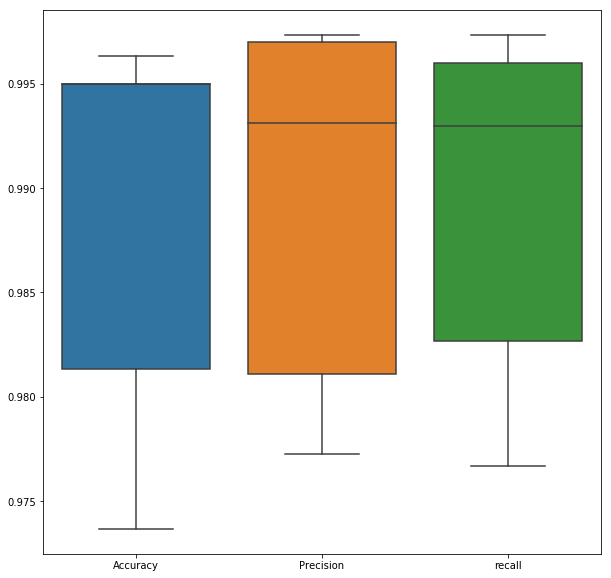

In [111]:
score=[]
score.append(score_cv_rf)
score.append(score_cv_rf_p)
score.append(score_cv_rf_r)
value=[]
value.append('Accuracy')
value.append('Precision')
value.append('recall')
plt.figure(figsize=(10,10))
sea.boxplot(y=score,x=value)